In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sklearn.metrics as metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

import warnings # supress warnings
warnings.filterwarnings('ignore')

## Parte 1: Análise Exploratória 

### Dados históricos de 10 criptomoedas entre 2019 e 2021

In [2]:
df_ada = pd.read_excel('datasets/investing/ADA_USD Binance Dados Históricos.xlsx')
df_bch = pd.read_excel('datasets/investing/BCH_USD Huobi Dados Históricos.xlsx')
df_bnb = pd.read_excel('datasets/investing/BNB_USD Binance Dados Históricos.xlsx')
df_btc = pd.read_excel('datasets/investing/BTC USD Binance Dados Historicos.xlsx')
df_eth = pd.read_excel('datasets/investing/ETH_USD Binance Dados Históricos.xlsx')
df_ltc = pd.read_excel('datasets/investing/LTC_USD Binance Dados Históricos.xlsx')
df_trx = pd.read_excel('datasets/investing/TRX_USD Binance Dados Históricos.xlsx')
df_usdt = pd.read_excel('datasets/investing/USDT USD Investing Dados Históricos.xlsx')
df_xlm = pd.read_excel('datasets/investing/XLM_USD Binance Dados Históricos.xlsx')
df_xrp = pd.read_excel('datasets/investing/XRP_USD Binance Dados Históricos.xlsx')

In [3]:
df_ada['Data'] = pd.to_datetime(df_ada['Data'])
df_bch['Data'] = pd.to_datetime(df_bch['Data'])
df_bnb['Data'] = pd.to_datetime(df_bnb['Data'])
df_btc['Data'] = pd.to_datetime(df_btc['Data'])
df_eth['Data'] = pd.to_datetime(df_eth['Data'])
df_ltc['Data'] = pd.to_datetime(df_ltc['Data'])
df_trx['Data'] = pd.to_datetime(df_trx['Data'])
df_usdt['Data'] = pd.to_datetime(df_usdt['Data'])
df_xlm['Data'] = pd.to_datetime(df_xlm['Data'])
df_xrp['Data'] = pd.to_datetime(df_xrp['Data'])

In [4]:
df_ada = df_ada.query('Data >= "01-01-2019"')
df_bch = df_bch.query('Data >= "01-01-2019"')
df_bnb = df_bnb.query('Data >= "01-01-2019"')
df_btc = df_btc.query('Data >= "01-01-2019"')
df_eth = df_eth.query('Data >= "01-01-2019"')
df_ltc = df_ltc.query('Data >= "01-01-2019"')
df_trx = df_trx.query('Data >= "01-01-2019"')
df_usdt = df_usdt.query('Data >= "01-01-2019"')
df_xlm = df_xlm.query('Data >= "01-01-2019"')
df_xrp = df_xrp.query('Data >= "01-01-2019"')

In [5]:
df_ada['pair'] = 'ADA/USD'
df_bch['pair'] = 'BCH/USD'
df_bnb['pair'] = 'BNB/USD'
df_btc['pair'] = 'BTC/USD'
df_eth['pair'] = 'ETH/USD'
df_ltc['pair'] = 'LTC/USD'
df_trx['pair'] = 'TRX/USD'
df_usdt['pair'] = 'USDT/USD'
df_xlm['pair'] = 'XLM/USD'
df_xrp['pair'] = 'XRP/USD'

In [6]:
df_fechamento = pd.DataFrame()
df_fechamento['#'] = df_ada['#']
df_fechamento['date'] = df_ada['Data']
df_fechamento['ADA'] = df_ada['Último']
df_fechamento['BCH'] = df_bch['Último']
df_fechamento['BNB'] = df_bnb['Último']
df_fechamento['BTC'] = df_btc['Último']
df_fechamento['ETH'] = df_eth['Último']
df_fechamento['LTC'] = df_ltc['Último']
df_fechamento['TRX'] = df_trx['Último']
df_fechamento['USDT'] = df_usdt['Último']
df_fechamento['XLM'] = df_xlm['Último']
df_fechamento['XRP'] = df_xrp['Último']
df_fechamento.sort_values(by=['#'], inplace=True, ascending=False, ignore_index=True)

In [7]:
df_fechamento.fillna(df_fechamento.mean(), inplace=True)

In [8]:
df_fechamento.dtypes

#                int64
date    datetime64[ns]
ADA            float64
BCH            float64
BNB            float64
BTC            float64
ETH            float64
LTC            float64
TRX            float64
USDT           float64
XLM            float64
XRP            float64
dtype: object

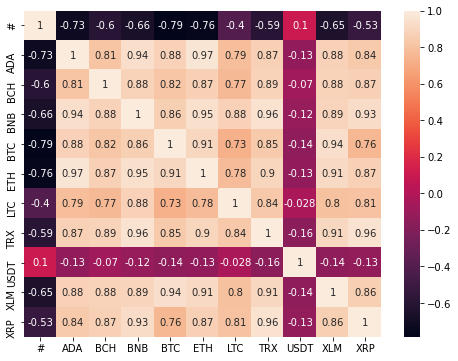

In [9]:
corr_fechamento = df_fechamento.corr(method='pearson')

plt.figure(figsize=(8, 6))
sb.heatmap(corr_fechamento, annot=True)
plt.show()

In [10]:
scaler = MinMaxScaler(feature_range = (0,1))
df_fechamento_norm = scaler.fit_transform(df_fechamento.drop(columns=['#', 'date']))
#df_fechamento_norm = minmax_scale(df_fechamento.drop(columns=['#', 'date']))
df_fechamento_norm = pd.DataFrame(df_fechamento_norm, columns=['ADA', 'BCH', 'BNB', 'BTC', 'ETH', 'LTC', 'TRX', 'USDT', 'XLM', 'XRP'])
df_fechamento_norm.head()

,ADA,BCH,BNB,BTC,ETH,LTC,TRX,USDT,XLM,XRP
0,0.007759,0.036316,0.000775,0.008770,0.147383,0.17459,0.069829,0.475524,0.116573,0.132303
1,0.008717,0.041198,0.000865,0.010193,0.147383,0.17459,0.072918,0.498834,0.121010,0.137176
2,0.007759,0.034043,0.000477,0.008107,0.147383,0.17459,0.072274,0.454545,0.113567,0.127507
3,0.008203,0.033667,0.000746,0.008635,0.147383,0.17459,0.081156,0.482517,0.115428,0.127901
4,0.008589,0.032896,0.000746,0.007904,0.147383,0.17459,0.086691,0.463869,0.113710,0.125294


<AxesSubplot:xlabel='Tempo', ylabel='Preço de Fechamento'>

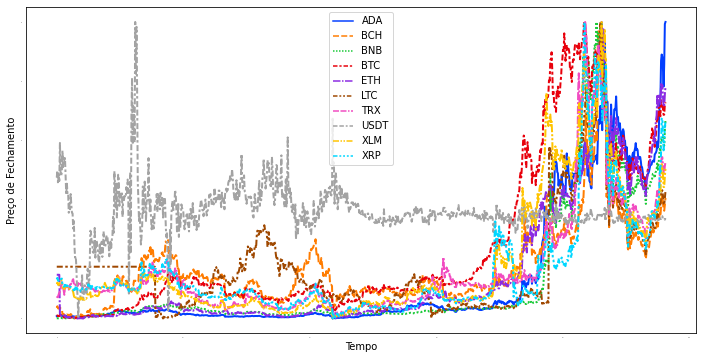

In [11]:
plt.figure(figsize=(12,6))
plt.tick_params(axis ='y', labelsize=0, length = 0)
plt.tick_params(axis ='x', labelsize=0, length = 0)
plt.xlabel("Tempo")
plt.ylabel("Preço de Fechamento")
#plt.gca().xaxis.set_major_locator(mdates.YearLocator())
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gcf().autofmt_xdate()
#plt.xticks([2019, 2020, 2021])
sb.lineplot(data=df_fechamento_norm, palette="bright", linewidth=2)

<AxesSubplot:>

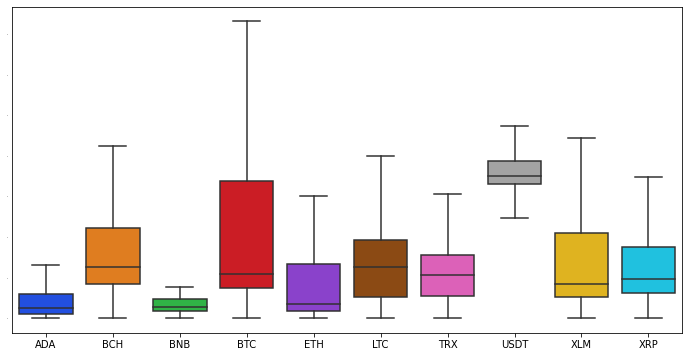

In [12]:
plt.figure(figsize=(12,6))
plt.tick_params(axis ='y', labelsize=0, length = 0)
sb.boxplot(data=df_fechamento_norm.loc[:, 'ADA':'XRP'], palette="bright", showfliers=False)

In [13]:
lista_medias = df_fechamento.loc[:, 'ADA':'XRP'].mean().tolist()
lista_desvios = df_fechamento.loc[:, 'ADA':'XRP'].std().tolist()
lista_medianas = df_fechamento.loc[:, 'ADA':'XRP'].median().tolist()
lista_maximos = df_fechamento.loc[:, 'ADA':'XRP'].max().tolist()
lista_minimos = df_fechamento.loc[:, 'ADA':'XRP'].min().tolist()
parametros = pd.DataFrame()
parametros['pair'] = ['ADA', 'BCH', 'BNB', 'BTC', 'ETH', 'LTC', 'TRX', 'USDT', 'XLM', 'XRP']
parametros['mean'] = lista_medias
parametros['std'] = lista_desvios
parametros['median'] = lista_medianas
parametros['max'] = lista_maximos
parametros['min'] = lista_minimos
parametros

,pair,mean,std,median,max,min
0,ADA,0.343026,0.536552,0.08250,2.45520,0.02313
1,BCH,351.662555,201.238749,289.54000,1547.79000,109.60000
2,BNB,89.410571,146.276439,23.06000,676.12000,5.47000
3,BTC,17681.678505,16066.947484,9898.80000,63518.00000,3436.10000
4,ETH,704.172839,889.862116,241.72000,4173.78000,104.42000
5,LTC,92.149405,60.604756,74.79000,387.96000,29.58000
6,TRX,0.033573,0.027349,0.02480,0.16381,0.00843
7,USDT,1.001321,0.003566,1.00090,1.02880,0.98590
8,XLM,0.156491,0.143012,0.09110,0.73068,0.03206
9,XRP,0.399244,0.291914,0.29787,1.83486,0.13566


<AxesSubplot:xlabel='pair'>

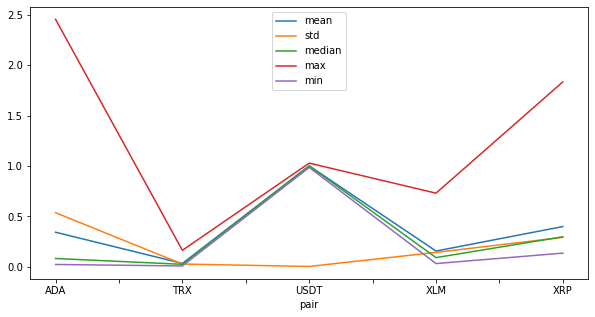

In [14]:
parametros_menores = parametros.query('pair == "ADA" | pair == "TRX" | pair == "USDT" | pair == "XLM" | pair == "XRP"')
parametros_menores.set_index(['pair'], inplace=True)
parametros_menores.plot(figsize=(10,5))

<AxesSubplot:xlabel='pair'>

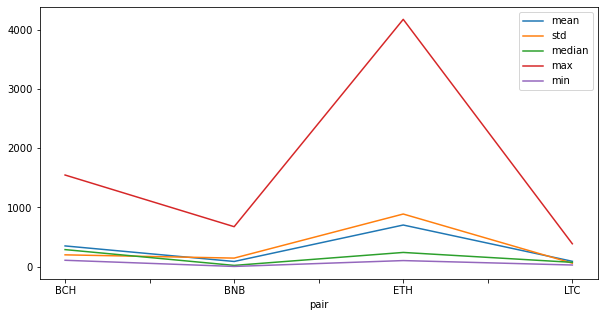

In [15]:
parametros_maiores = parametros.query('pair == "ETH" | pair == "BCH" | pair == "BNB" | pair == "LTC"')
parametros_maiores.set_index(['pair'], inplace=True)
parametros_maiores.plot(figsize=(10,5))

## Parte 2: Modelos de Regressão

### Prevendo o preço de fechamento do Bitcoin a partir de outras criptomoedas

In [16]:
X = df_fechamento_norm.drop(columns='BTC').values
Y =  df_fechamento_norm['BTC']

In [17]:
X

array([[7.75882273e-03, 3.63164811e-02, 7.75367181e-04, ...,
        4.75524476e-01, 1.16572672e-01, 1.32303437e-01],
       [8.71685437e-03, 4.11976164e-02, 8.64832625e-04, ...,
        4.98834499e-01, 1.21009991e-01, 1.37176318e-01],
       [7.75882273e-03, 3.40427899e-02, 4.77149035e-04, ...,
        4.54545455e-01, 1.13566746e-01, 1.27507062e-01],
       ...,
       [8.58433351e-01, 3.63276062e-01, 5.82971744e-01, ...,
        3.35664336e-01, 4.43903696e-01, 5.93538136e-01],
       [9.93174539e-01, 3.82835369e-01, 6.35115187e-01, ...,
        3.33333333e-01, 4.79674215e-01, 6.46975047e-01],
       [1.00000000e+00, 4.06309319e-01, 6.70111086e-01, ...,
        3.37995338e-01, 5.05038504e-01, 6.63571092e-01]])

In [18]:
Y

0      0.008770
1      0.010193
2      0.008107
3      0.008635
4      0.007904
         ...   
958    0.707433
959    0.686761
960    0.687527
961    0.721164
962    0.729163
Name: BTC, Length: 963, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [20]:
degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10]

y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)
    
    train_r2 = round(metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, train_r2, test_r2))

Polynomial degree 2: train score=0.99, test score=0.98
Polynomial degree 3: train score=1.0, test score=0.71
Polynomial degree 4: train score=1.0, test score=-480481.61
Polynomial degree 5: train score=1.0, test score=-686817.7
Polynomial degree 6: train score=1.0, test score=-882524.07
Polynomial degree 7: train score=1.0, test score=-1884864.29
Polynomial degree 8: train score=1.0, test score=-7023996.0
Polynomial degree 9: train score=1.0, test score=-15945210.91
Polynomial degree 10: train score=1.0, test score=-26931531.55


In [21]:
lr = LinearRegression()

folds = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores_train = np.round(cross_val_score(lr, X_train, y_train, scoring='r2', cv=folds),2)
scores_test = np.round(cross_val_score(lr, X_test, y_test, scoring='r2', cv=folds), 2)

for i in range(0,len(scores_test)):
    print("Fold {0}: train score={1}, test score={2}".format(i, scores_train[i], scores_test[i]))

print("Average score: train score={0}, test score={1}".format(np.round(scores_train.mean(),2), np.round(scores_test.mean(), 2)))

Fold 0: train score=0.95, test score=0.94
Fold 1: train score=0.88, test score=0.95
Fold 2: train score=0.94, test score=0.97
Fold 3: train score=0.94, test score=0.92
Fold 4: train score=0.95, test score=0.91
Fold 5: train score=0.91, test score=0.95
Fold 6: train score=0.84, test score=0.82
Fold 7: train score=0.95, test score=0.9
Fold 8: train score=0.92, test score=0.96
Fold 9: train score=0.92, test score=0.89
Average score: train score=0.92, test score=0.92


In [22]:
lr_predictions = cross_val_predict(lr, X_test, y_test, cv=folds)

In [23]:
lr.fit(X, Y)

LinearRegression()

In [24]:
svr = svm.SVR(kernel='linear')
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores_train = np.round(cross_val_score(svr, X_train, y_train, scoring='r2', cv=folds),2)
scores_test = np.round(cross_val_score(svr, X_test, y_test, scoring='r2', cv=folds), 2)

for i in range(0,len(scores_test)):
    print("Fold {0}: train score={1}, test score={2}".format(i, scores_train[i], scores_test[i]))

print("Average score: train score={0}, test score={1}".format(np.round(scores_train.mean(),2), np.round(scores_test.mean(), 2)))

Fold 0: train score=0.94, test score=0.94
Fold 1: train score=0.86, test score=0.95
Fold 2: train score=0.93, test score=0.97
Fold 3: train score=0.93, test score=0.94
Fold 4: train score=0.93, test score=0.91
Fold 5: train score=0.91, test score=0.95
Fold 6: train score=0.84, test score=0.86
Fold 7: train score=0.95, test score=0.87
Fold 8: train score=0.92, test score=0.95
Fold 9: train score=0.92, test score=0.92
Average score: train score=0.91, test score=0.93


In [25]:
svr_predictions = cross_val_predict(svr, X_test, y_test, cv=folds)

In [26]:
svr.fit(X, Y)

SVR(kernel='linear')

In [27]:
mlpr = MLPRegressor(hidden_layer_sizes = (100, 50, 100), 
                    activation = 'relu', solver = 'adam', 
                    max_iter = 1500, learning_rate = 'adaptive', 
                    learning_rate_init = 0.001)

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores_train = np.round(cross_val_score(mlpr, X_train, y_train, scoring='r2', cv=folds),2)
scores_test = np.round(cross_val_score(mlpr, X_test, y_test, scoring='r2', cv=folds), 2)

for i in range(0,len(scores_test)):
    print("Fold {0}: train score={1}, test score={2}".format(i, scores_train[i], scores_test[i]))

print("Average score: train score={0}, test score={1}".format(np.round(scores_train.mean(),2), np.round(scores_test.mean(), 2)))

Fold 0: train score=0.96, test score=0.89
Fold 1: train score=0.97, test score=0.95
Fold 2: train score=0.94, test score=0.94
Fold 3: train score=0.97, test score=0.93
Fold 4: train score=0.93, test score=0.96
Fold 5: train score=0.97, test score=0.97
Fold 6: train score=0.96, test score=0.96
Fold 7: train score=0.97, test score=0.97
Fold 8: train score=0.95, test score=0.92
Fold 9: train score=0.96, test score=0.92
Average score: train score=0.96, test score=0.94


In [28]:
mlpr_predictions = cross_val_predict(mlpr, X_test, y_test, cv=folds)

In [29]:
mlpr.fit(X, Y)

MLPRegressor(hidden_layer_sizes=(100, 50, 100), learning_rate='adaptive',
             max_iter=1500)

## Parte 3: Avaliação dos modelos

In [30]:
X_test

array([[0.02299687, 0.09119101, 0.01690897, ..., 0.33100233, 0.06016146,
        0.03335099],
       [0.00579753, 0.06861402, 0.01470215, ..., 0.43123543, 0.03229223,
        0.052254  ],
       [0.00407472, 0.05316405, 0.01171997, ..., 0.45687646, 0.01880851,
        0.03076742],
       ...,
       [0.51062264, 0.24723437, 0.45254604, ..., 0.33333333, 0.28659357,
        0.28468691],
       [0.64104652, 0.33771616, 0.51755759, ..., 0.34731935, 0.45483954,
        0.43446328],
       [0.00927605, 0.14102448, 0.02008499, ..., 0.42890443, 0.03400991,
        0.05386653]])

In [31]:
y_test = y_test.reset_index(drop=True)
y_test

0      0.100608
1      0.065634
2      0.062343
3      0.922156
4      0.078666
         ...   
284    0.540259
285    0.097861
286    0.487516
287    0.498967
288    0.085368
Name: BTC, Length: 289, dtype: float64

In [32]:
df_final = pd.DataFrame(X_test)
df_final[9] = y_test.to_frame()
df_final_rev = scaler.inverse_transform(df_final)
df_final_rev = pd.DataFrame(df_final_rev)
df_final_rev.head()

,0,1,2,3,4,5,6,7,8,9
0,0.07906,240.75,16.81,5531.472060,276.900547,48.608414,0.059861,0.988481,0.055360,0.306613
1,0.03723,208.28,15.33,4040.556963,1112.165131,43.303523,0.075435,0.987285,0.068566,0.247185
2,0.03304,186.06,13.33,3988.586066,670.119858,40.051394,0.079419,0.986707,0.053555,0.241594
3,1.21266,526.00,311.41,29080.046383,1990.918885,162.294540,0.062759,1.008560,0.207451,1.702588
4,0.03967,222.70,15.69,4559.232417,605.624170,44.871926,0.086663,0.987551,0.080423,0.269329


In [33]:
df_lr = pd.DataFrame(X_test)
df_lr[9] = pd.DataFrame(lr_predictions)
df_lr_rev = scaler.inverse_transform(df_lr)
df_lr_rev = pd.DataFrame(df_lr_rev)
df_lr_rev.head()

,0,1,2,3,4,5,6,7,8,9
0,0.07906,240.75,16.81,5531.472060,276.900547,48.608414,0.059861,0.988481,0.055360,0.350882
1,0.03723,208.28,15.33,4040.556963,1112.165131,43.303523,0.075435,0.987285,0.068566,0.178126
2,0.03304,186.06,13.33,3988.586066,670.119858,40.051394,0.079419,0.986707,0.053555,0.244750
3,1.21266,526.00,311.41,29080.046383,1990.918885,162.294540,0.062759,1.008560,0.207451,1.388245
4,0.03967,222.70,15.69,4559.232417,605.624170,44.871926,0.086663,0.987551,0.080423,0.247573


In [34]:
df_svr = pd.DataFrame(X_test)
df_svr[9] = pd.DataFrame(svr_predictions)
df_svr_rev = scaler.inverse_transform(df_svr)
df_svr_rev = pd.DataFrame(df_svr_rev)
df_svr_rev.head()

,0,1,2,3,4,5,6,7,8,9
0,0.07906,240.75,16.81,5531.472060,276.900547,48.608414,0.059861,0.988481,0.055360,0.353237
1,0.03723,208.28,15.33,4040.556963,1112.165131,43.303523,0.075435,0.987285,0.068566,0.192546
2,0.03304,186.06,13.33,3988.586066,670.119858,40.051394,0.079419,0.986707,0.053555,0.234644
3,1.21266,526.00,311.41,29080.046383,1990.918885,162.294540,0.062759,1.008560,0.207451,1.305823
4,0.03967,222.70,15.69,4559.232417,605.624170,44.871926,0.086663,0.987551,0.080423,0.241498


In [35]:
df_mlpr = pd.DataFrame(X_test)
df_mlpr[9] = pd.DataFrame(mlpr_predictions)
df_mlpr_rev = scaler.inverse_transform(df_mlpr)
df_mlpr_rev = pd.DataFrame(df_mlpr_rev)
df_mlpr_rev.head()

,0,1,2,3,4,5,6,7,8,9
0,0.07906,240.75,16.81,5531.472060,276.900547,48.608414,0.059861,0.988481,0.055360,0.290662
1,0.03723,208.28,15.33,4040.556963,1112.165131,43.303523,0.075435,0.987285,0.068566,0.203951
2,0.03304,186.06,13.33,3988.586066,670.119858,40.051394,0.079419,0.986707,0.053555,0.201275
3,1.21266,526.00,311.41,29080.046383,1990.918885,162.294540,0.062759,1.008560,0.207451,1.410961
4,0.03967,222.70,15.69,4559.232417,605.624170,44.871926,0.086663,0.987551,0.080423,0.242758


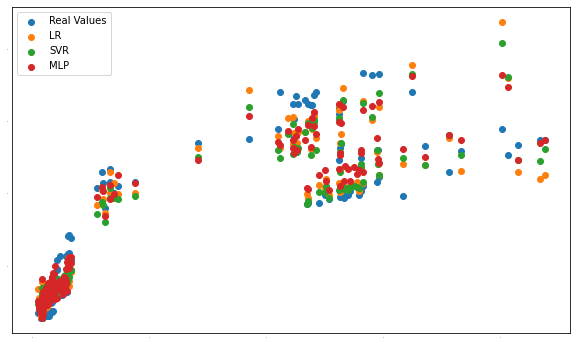

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(df_final_rev[0], df_final_rev[9], label='Real Values')
plt.scatter(df_lr_rev[0], df_lr_rev[9], label='LR')
plt.scatter(df_svr_rev[0], df_svr_rev[9], label='SVR')
plt.scatter(df_mlpr_rev[0], df_mlpr_rev[9], label='MLP')
plt.tick_params(axis ='y', labelsize=0, length = 0)
plt.tick_params(axis ='x', labelsize=0, length = 0)
plt.legend()
plt.show()

In [37]:
print('MLPR Metrics')
print('Mean Absolute Error: {0}'.format(round(metrics.mean_absolute_error(y_test, mlpr_predictions), 4)))
print('Mean Squared Error: {0}'.format(round(metrics.mean_squared_error(y_test, mlpr_predictions), 4)))
print('Root Mean Squared Error: {0}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, mlpr_predictions)), 4)))

MLPR Metrics
Mean Absolute Error: 0.0407
Mean Squared Error: 0.0036
Root Mean Squared Error: 0.0604


In [38]:
print('LR Metrics')
print('Mean Absolute Error: {0}'.format(round(metrics.mean_absolute_error(y_test, lr_predictions), 4)))
print('Mean Squared Error: {0}'.format(round(metrics.mean_squared_error(y_test, lr_predictions), 4)))
print('Root Mean Squared Error: {0}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)), 4)))

LR Metrics
Mean Absolute Error: 0.0486
Mean Squared Error: 0.0048
Root Mean Squared Error: 0.0689


In [39]:
print('SVR Metrics')
print('Mean Absolute Error: {0}'.format(round(metrics.mean_absolute_error(y_test, svr_predictions), 4)))
print('Mean Squared Error: {0}'.format(round(metrics.mean_squared_error(y_test, svr_predictions), 4)))
print('Root Mean Squared Error: {0}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, svr_predictions)), 4)))

SVR Metrics
Mean Absolute Error: 0.0491
Mean Squared Error: 0.0048
Root Mean Squared Error: 0.0694


In [40]:
print('MLPR x LR Metrics')
print('Mean Absolute Error: {0}'.format(round(metrics.mean_absolute_error(mlpr_predictions, lr_predictions), 4)))
print('Mean Squared Error: {0}'.format(round(metrics.mean_squared_error(mlpr_predictions, lr_predictions), 4)))
print('Root Mean Squared Error: {0}'.format(round(np.sqrt(metrics.mean_squared_error(mlpr_predictions, lr_predictions)), 4)))

MLPR x LR Metrics
Mean Absolute Error: 0.0288
Mean Squared Error: 0.0015
Root Mean Squared Error: 0.0393


In [41]:
print(lr.coef_)
print(lr.intercept_)

[-0.07201119 -0.08481611  0.68530668  0.23645411 -0.29795469  0.19581163
  0.01542964  1.14993889 -0.88119026]
0.08689072453395974


In [42]:
print(svr.coef_)
print(svr.intercept_)

[[ 0.08323559 -0.16854335  0.55516135  0.15336209 -0.40313834  0.47930328
  -0.00984655  1.11089868 -0.90744904]]
[0.11047762]
